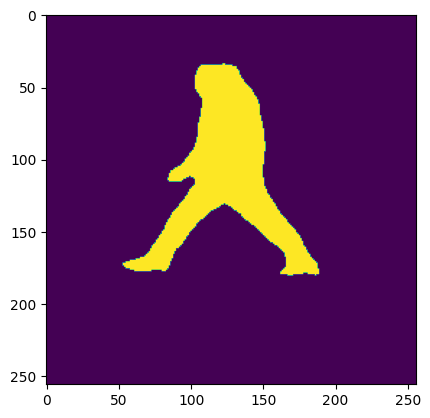

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

files = os.listdir('./test_dataset/masks/')
images = [cv2.imread('./test_dataset/masks/'+'/'+f, 0) for f in files]

plt.imshow(images[0])

In [2]:
def mass_center(img,is_round=True):
    Y = img.mean(axis=1)
    X = img.mean(axis=0)
    Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
    X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
    if is_round:
        return int(round(X_)),int(round(Y_))
    return X_,Y_

def image_extract(img,newsize):
    x_s = np.where(img.mean(axis=0)!=0)[0].min()
    x_e = np.where(img.mean(axis=0)!=0)[0].max()
    
    y_s = np.where(img.mean(axis=1)!=0)[0].min()
    y_e = np.where(img.mean(axis=1)!=0)[0].max()
    
    x_c,_ = mass_center(img)
    # x_c = (x_s+x_e)//2
    x_s = x_c-newsize[1]//2
    x_e = x_c+newsize[1]//2
    img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
    return cv2.resize(img,newsize)

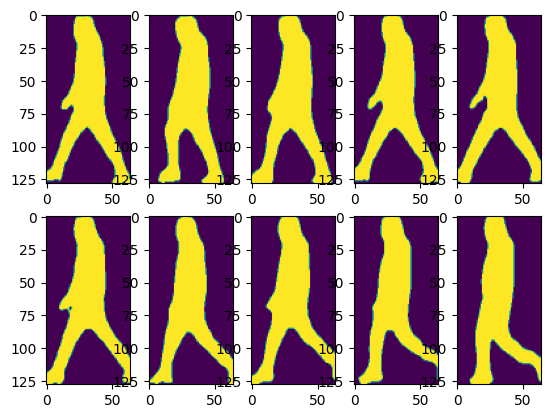

In [3]:
images = [image_extract(i,(64, 128)) for i in images]

plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
plt.show()

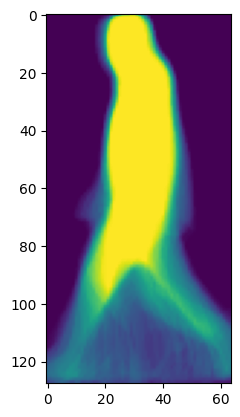

In [6]:
gei = np.mean(images,axis=0)

cv2.imwrite('./energy_image.png', cv2.resize(gei, (512,1024)))

plt.imshow(gei)
plt.show()